In [1]:
import pandas as pd
import sys
from collections import Counter
from tqdm import tqdm

recommenders_path = 'Recommenders'
sys.path.append(recommenders_path)

graphs_path = 'Graphs'
sys.path.append(graphs_path)

spotify_path = 'Spotify'
sys.path.append(spotify_path)

graphics_path = 'Graphics'
sys.path.append(graphics_path)

from Recommenders.StrongerConnectionsRecommender import StrongerConnectionsRecommender
from Graphs.SimpleGraph import SimpleGraph
from Graphics.Graphics import Graphics

In [2]:
df = pd.read_csv('../data/spotify_artists.csv')
df

,external_urls,followers,genres,id,name,popularity,uri,related_artists_ids
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY,"5WUlDfRSoLAfcVSX1WnrxN, 2wY79sveU1sp5g7SokKOiI..."
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,"4nDoRrQiYLoBzwC5BhVJzF, 0C8ZW7ezQVs4URX5aX7Kqx..."
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca,"5dHt1vcEm9qb8fCyLcB3HL, 2P5sC9cVZDToPxyomzF1UH..."
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,"0C8ZW7ezQVs4URX5aX7Kqx, 1McMsnEElThX1knmY4oliG..."
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH,"77SW9BnxLY8rJ0RciFqkHh, 0epOFNiUfyON9EYx7Tpr6V..."
...,...,...,...,...,...,...,...,...
14783,https://open.spotify.com/artist/7EyzyrMNgqiK8b...,1417807,rap mineiro,7EyzyrMNgqiK8bMrbkOT9l,Sidoka,59,spotify:artist:7EyzyrMNgqiK8bMrbkOT9l,"4oPnjkJcLqOim9KJxvIYMz, 1QBWA6tuiZ0JuDluPqbe71..."
14784,https://open.spotify.com/artist/6gzXCdfYfFe5XK...,2313438,"k-pop, k-pop boy group",6gzXCdfYfFe5XKhPKkYqxV,SUPER JUNIOR,58,spotify:artist:6gzXCdfYfFe5XKhPKkYqxV,"6nVMMEywS5Y4tsHPKx1nIo, 1bkpTEmumLC3xc7HgMsttU..."
14785,https://open.spotify.com/artist/7AAXcP4NpvvLM9...,609413,"sertanejo, sertanejo universitario",7AAXcP4NpvvLM9Xcfy64ij,Hugo Pena & Gabriel,40,spotify:artist:7AAXcP4NpvvLM9Xcfy64ij,"5Dyg6H3QJHQV5c7ojyKWyv, 4ZUahcHoVxr4lsrfdmhjhV..."
14786,https://open.spotify.com/artist/5KvkOKroKLz202...,186296,"folk metal, german metal, melodic death metal,...",5KvkOKroKLz202ioXfGWR2,Equilibrium,49,spotify:artist:5KvkOKroKLz202ioXfGWR2,3t5X2CVDf5mrlIx1SdvWYM


In [3]:
artists_ids = {}
for i in range(len(df)):
    artists_ids[df['id'][i]] = df['name'][i]

In [4]:
genres = {}
for index in range(len(df)):
    for genre_artist in df['genres'][index].split(', '):
        if genre_artist not in genres: genres[genre_artist] = []
        genres[genre_artist].append(df['id'][index])

In [5]:
connections = []
for genre in genres:
    for i in range(len(genres[genre])):
        for j in range(i+1, len(genres[genre])):
           artist_1, artist_2 = (genres[genre][i], genres[genre][j]) if genres[genre][i] < genres[genre][j] else (genres[genre][j], genres[genre][i])
           connections.append((artist_1, artist_2))

In [6]:
counter = Counter(connections)
edges = []
for artists, weight in counter.items():
    artist_1, artist_2 = artists
    edges.append((artist_1, artist_2, weight))

In [7]:
G = SimpleGraph()
artists_nodes = [(df['id'][index], dict(popularity=int(df['popularity'][index]), name=str(df['name'][index]), genre=str(df['genres'][index].split(', ')[0]))) for index in range(len(df['id']))]
G.add_nodes(artists_nodes)
G.add_edges(edges)
name_network = 'stronger_connections_recommender'

## **Analisando a rede**

### **Informações báiscas**

In [8]:
print(f'Quantidade de vértices: {G.get_number_of_nodes()}')
print(f'Quantidade de arestas: {G.get_number_of_edges()}')
print(f'Quantidade de componentes: {G.get_number_connected_components()}')
print(f'Menor grau da rede: {G.get_minimum_degree()}')
print(f'Maior grau da rede: {G.get_maximum_degree()}')
print(f'Grau médio da rede: {G.get_average_degree()}')
print(f'Densidade da rede: {G.get_density()}')
#print(f'Distância média: {G.average_shortest_path_length()}')
#average_clustering_coefficient, percentage_of_considered_nodes = G.get_average_clustering_coefficient()
#print(f'Coeficiente de clustering médio: {average_clustering_coefficient} (apenas {percentage_of_considered_nodes:.2%} da rede foi considerada no cálculo, que que possuem grau maior do que um)')

Quantidade de vértices: 14788
Quantidade de arestas: 774610
Quantidade de componentes: 118
Menor grau da rede: 1
Maior grau da rede: 768
Grau médio da rede: 104.76196916418718
Densidade da rede: 0.0070847345076206925


In [9]:
'''import os 

edges_list = [(a, b) for a, b, _ in edges]

df = pd.DataFrame(edges_list)

df.to_csv(f'gephi_edges_list.csv', index=False, header=False)'''

"import os \n\nedges_list = [(a, b) for a, b, _ in edges]\n\ndf = pd.DataFrame(edges_list)\n\ndf.to_csv(f'gephi_edges_list.csv', index=False, header=False)"

### **Distribuição de graus**

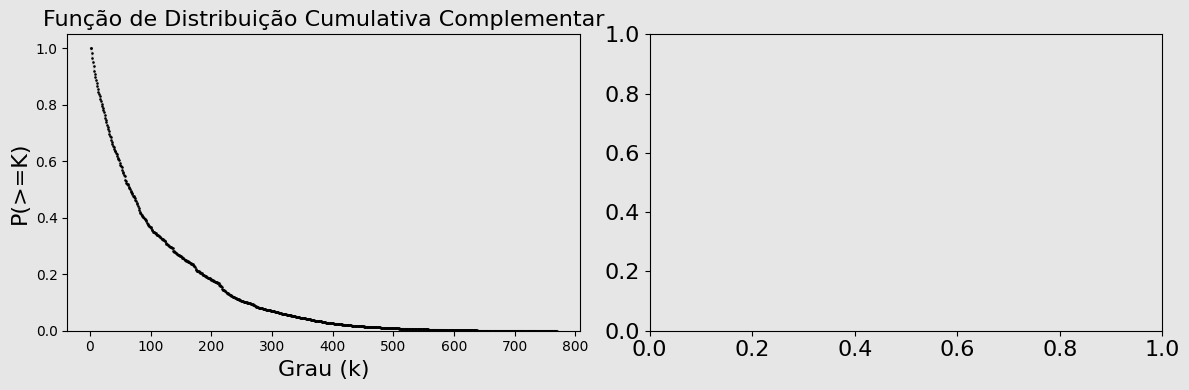

In [10]:
frequencies_of_degrees, probability_of_degrees, accumulated_probability_of_degress = G.get_degree_distribution()
#Graphics.create_graphic_degrees(data = frequencies_of_degrees, xLabel = 'Grau (K)', yLabel = 'Frequência', title = 'Frequência dos Graus', limit = 5, lines = False, name_network = name_network)
#Graphics.create_graphic_degrees(data = probability_of_degrees, xLabel = 'Grau (K)', yLabel = 'P(k)', title = 'Probabilidade dos Graus', limit = 0.01, lines = False,  name_network = name_network)
Graphics.create_graphic_degrees(data = accumulated_probability_of_degress, xLabel = 'Grau (k)', yLabel = 'P(>=K)', title = 'Função de Distribuição Cumulativa Complementar', limit = 0.05, lines = True,  name_network = name_network)

### **Centralidades**

#### **Centralidade por Grau**

In [11]:
#degree_centrality=G.get_degree_centrality()
#analysis_centrality=Graphics.create_graphic_centrality(data=degree_centrality, title='Centralidade por Grau', name_network=name_network)
#Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G, title='Centralidade por Grau - Rede Completa - Ranking', name_network=name_network, label='genre')

In [12]:
#eigenvector_centrality=G.get_eigenvector_centrality(weight='weight')
#analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title='Centralidade por Autovetor', name_network=name_network)
#Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G, title='Centralidade por Autovetor - Ranking', name_network=name_network)

### **Comunidades**

In [13]:
#louvain_communities = G.get_louvain_communities(weight='weight')

In [14]:
#sorted_louvain_communities = sorted(louvain_communities, key=len, reverse=True)

In [15]:
#for index, community in enumerate(sorted_louvain_communities):
#    print(f'Comunidade {index+1:2}', end=' ')
#    community_list = []
#    for artist_id in community:
#        community_list.append(G.graph.nodes[artist_id]['name'])
#    print(f'({len(community_list):4}): ', community_list)
#    if len(community_list) == 1: print(G.get_degree(artist_id))

In [16]:
'''for number in range(1):
    edges_community_aux = []
    nodes_community = list(sorted_louvain_communities[number])
    for i in range(len(nodes_community)):
        for j in range(i+1, len(nodes_community)):
           if G.graph.has_edge(nodes_community[i], nodes_community[j]) or G.graph.has_edge(nodes_community[j], nodes_community[i]):    
              artist_1, artist_2 = (nodes_community[i], nodes_community[j]) if nodes_community[i] < nodes_community[j] else (nodes_community[j], nodes_community[i])
              edges_community_aux.append((artist_1, artist_2))
    counter = Counter(edges_community_aux)
    edges_community = []
    for artists, weight in counter.items():
        artist_1, artist_2 = artists
        edges_community.append((artist_1, artist_2, weight))'''

'for number in range(1):\n    edges_community_aux = []\n    nodes_community = list(sorted_louvain_communities[number])\n    for i in range(len(nodes_community)):\n        for j in range(i+1, len(nodes_community)):\n           if G.graph.has_edge(nodes_community[i], nodes_community[j]) or G.graph.has_edge(nodes_community[j], nodes_community[i]):    \n              artist_1, artist_2 = (nodes_community[i], nodes_community[j]) if nodes_community[i] < nodes_community[j] else (nodes_community[j], nodes_community[i])\n              edges_community_aux.append((artist_1, artist_2))\n    counter = Counter(edges_community_aux)\n    edges_community = []\n    for artists, weight in counter.items():\n        artist_1, artist_2 = artists\n        edges_community.append((artist_1, artist_2, weight))'

In [17]:
'''number = 51
edges_community_aux = []
nodes_community = list(sorted_louvain_communities[number])
for i in range(len(nodes_community)):
    for j in range(i+1, len(nodes_community)):
        if G.graph.has_edge(nodes_community[i], nodes_community[j]) or G.graph.has_edge(nodes_community[j], nodes_community[i]):    
            artist_1, artist_2 = (nodes_community[i], nodes_community[j]) if nodes_community[i] < nodes_community[j] else (nodes_community[j], nodes_community[i])
            edges_community_aux.append((artist_1, artist_2))
    counter = Counter(edges_community_aux)
    edges_community = []
    for artists, weight in counter.items():
        if weight != 1: print('a')
        artist_1, artist_2 = artists
        edges_community.append((artist_1, artist_2, weight))'''

"number = 51\nedges_community_aux = []\nnodes_community = list(sorted_louvain_communities[number])\nfor i in range(len(nodes_community)):\n    for j in range(i+1, len(nodes_community)):\n        if G.graph.has_edge(nodes_community[i], nodes_community[j]) or G.graph.has_edge(nodes_community[j], nodes_community[i]):    \n            artist_1, artist_2 = (nodes_community[i], nodes_community[j]) if nodes_community[i] < nodes_community[j] else (nodes_community[j], nodes_community[i])\n            edges_community_aux.append((artist_1, artist_2))\n    counter = Counter(edges_community_aux)\n    edges_community = []\n    for artists, weight in counter.items():\n        if weight != 1: print('a')\n        artist_1, artist_2 = artists\n        edges_community.append((artist_1, artist_2, weight))"

In [18]:
'''G_community = SimpleGraph()
artists_nodes = [(df['id'][int(df[df['id'] == node].index[0])], dict(popularity=int(df['popularity'][int(df[df['id'] == node].index[0])]), name=str(df['name'][int(df[df['id'] == node].index[0])]), genre=str(df['genres'][int(df[df['id'] == node].index[0])].split(', ')[0]))) for node in nodes_community]
G_community.add_nodes(artists_nodes)
G_community.add_edges(edges_community)
print(G_community.get_number_of_nodes())
print(G_community.get_number_of_edges())'''

"G_community = SimpleGraph()\nartists_nodes = [(df['id'][int(df[df['id'] == node].index[0])], dict(popularity=int(df['popularity'][int(df[df['id'] == node].index[0])]), name=str(df['name'][int(df[df['id'] == node].index[0])]), genre=str(df['genres'][int(df[df['id'] == node].index[0])].split(', ')[0]))) for node in nodes_community]\nG_community.add_nodes(artists_nodes)\nG_community.add_edges(edges_community)\nprint(G_community.get_number_of_nodes())\nprint(G_community.get_number_of_edges())"

In [19]:
'''for a in G_community.graph.edges():
    a1, a2 = a
    print(df['name'][int(df[df['id'] == a1].index[0])], ',',df['name'][int(df[df['id'] == a2].index[0])])'''

"for a in G_community.graph.edges():\n    a1, a2 = a\n    print(df['name'][int(df[df['id'] == a1].index[0])], ',',df['name'][int(df[df['id'] == a2].index[0])])"

In [20]:
''''degree_centrality=G_community.get_degree_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=degree_centrality, title=f'Centralidade por Grau - Comunidade de Música Brasileira', name_network=name_network)
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G_community, title=f'Centralidade por Grau - Comunidade DE Música Brasileira - Ranking', name_network=name_network, label='genre')'''

"'degree_centrality=G_community.get_degree_centrality()\nanalysis_centrality=Graphics.create_graphic_centrality(data=degree_centrality, title=f'Centralidade por Grau - Comunidade de Música Brasileira', name_network=name_network)\nGraphics.create_ranking_centrality(centrality=degree_centrality, graph=G_community, title=f'Centralidade por Grau - Comunidade DE Música Brasileira - Ranking', name_network=name_network, label='genre')"

In [21]:
'''eigenvector_centrality=G_community.get_eigenvector_centrality(weight='weight')
analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title=f'Centralidade por Autovetor - Comunidade {number}', name_network=name_network)
Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G_community, title=f'Centralidade por Autovetor - Comunidade {number} - Ranking', name_network=name_network, label='genre')'''

"eigenvector_centrality=G_community.get_eigenvector_centrality(weight='weight')\nanalysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title=f'Centralidade por Autovetor - Comunidade {number}', name_network=name_network)\nGraphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G_community, title=f'Centralidade por Autovetor - Comunidade {number} - Ranking', name_network=name_network, label='genre')"

In [22]:
'''eigenvector_centrality=G_community.get_eigenvector_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title=f'Centralidade por Autovetor - Comunidade {number}', name_network=name_network)
Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G_community, title=f'Centralidade por Autovetor - Comunidade {number} - Ranking', name_network=name_network)'''

"eigenvector_centrality=G_community.get_eigenvector_centrality()\nanalysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title=f'Centralidade por Autovetor - Comunidade {number}', name_network=name_network)\nGraphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G_community, title=f'Centralidade por Autovetor - Comunidade {number} - Ranking', name_network=name_network)"

## **Recomendador**

In [34]:
analysis = {}
counter_nan=0
for index in tqdm(range(len(df))):
    if type(df['related_artists_ids'][index]) == float: 
        counter_nan+=1
        continue

    related_artists_ids = df['related_artists_ids'][index].split(', ')
    number_recommendations = len(related_artists_ids)

    recommender = StrongerConnectionsRecommender(G, number_recommendations)
    recommended_artists = recommender.make_recommendations(df['id'][index], collaborations=False)

    #if len(recommended_artists) == number_recommendations:
    counter=0
    for artist_id in recommended_artists:
        if artist_id in related_artists_ids:
            counter+=1
    analysis[df['id'][index]] =  counter/len(recommended_artists) 

100%|██████████| 14788/14788 [00:04<00:00, 3554.63it/s]


In [24]:
len(df)

14788

In [25]:
counter_nan # quantidade de nan

1228

In [26]:
len(analysis) # quantidade total que pegamos

13560

In [27]:
len(df) - (len(analysis) + counter_nan) # quantidade que n consegumis pegar igual

0

In [35]:
total_correct_mean = sum(analysis.values())/len(analysis.values())
print(total_correct_mean)

0.17889635311940458


In [29]:
len(analysis)

13560

In [30]:
'''analysis = {}
for index in tqdm(range(len(df))):
    if type(df['related_artists_ids'][index]) == float: continue

    related_artists_ids = df['related_artists_ids'][index].split(', ')
    number_recommendations = len(related_artists_ids)
    recommender = StrongerConnectionsRecommender(G, number_recommendations)
    recommended_artists = recommender.make_recommendations(df['id'][index], collaborations=True)

    if len(recommended_artists) == number_recommendations:
        counter=0
        for artist_id in related_artists_ids:
            if artist_id in recommended_artists:
                counter+=1
        analysis[df['id'][index]] =  counter/number_recommendations'''

"analysis = {}\nfor index in tqdm(range(len(df))):\n    if type(df['related_artists_ids'][index]) == float: continue\n\n    related_artists_ids = df['related_artists_ids'][index].split(', ')\n    number_recommendations = len(related_artists_ids)\n    recommender = StrongerConnectionsRecommender(G, number_recommendations)\n    recommended_artists = recommender.make_recommendations(df['id'][index], collaborations=True)\n\n    if len(recommended_artists) == number_recommendations:\n        counter=0\n        for artist_id in related_artists_ids:\n            if artist_id in recommended_artists:\n                counter+=1\n        analysis[df['id'][index]] =  counter/number_recommendations"

In [31]:
'''total_correct_mean = sum(analysis.values())/len(analysis.values())
print(total_correct_mean)'''

'total_correct_mean = sum(analysis.values())/len(analysis.values())\nprint(total_correct_mean)'

In [32]:
'''recommender.convert_recommendations(artist_id, artists_ids)'''

'recommender.convert_recommendations(artist_id, artists_ids)'

In [33]:
'''recommender.make_recommendations(artist_id, collaborations=True)
recommender.convert_recommendations(artist_id, artists_ids)'''

'recommender.make_recommendations(artist_id, collaborations=True)\nrecommender.convert_recommendations(artist_id, artists_ids)'